In [1]:
from ler.rates import LeR
from ler.utils import get_param_from_json
import numpy as np
import matplotlib.pyplot as plt

# other necessary imports
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

Setting multiprocessing start method to 'fork'


In [2]:
# Complete setup for LeR

ler = LeR(
    # LeR setup arguments
    npool=8, # number of processors to use
    z_min=0.0, # minimum redshift
    z_max=10.0, # maximum redshift
    event_type='BBH', # event type
    cosmology=cosmo, # cosmology
    snr_finder=None, # snr calculator from 'gwsnr' package will be used
    pdet_finder=None,  # will not be consider unless specified
    list_of_detectors=None, # list of detectors that will be considered when calculating snr or pdet for lensed events. if None, all the detectors from 'gwsnr' will be considered; [L1,H1,V1]
    json_file_names=dict(
        ler_params="ler_params.json", # to store initialization parameters and important results
        unlensed_param="unlensed_param_baseline.json", # to store all unlensed events
        unlensed_param_detectable="unlensed_param_detectable_baseline.json", # to store only detectable unlensed events
        lensed_param="lensed_param_baseline.json", # to store all lensed events 
        lensed_param_detectable="lensed_param_detectable_baseline.json"), # to store only detectable lensed events
    interpolator_directory='./interpolator_pickle', # directory to store the interpolator pickle files. 'ler' uses interpolation to get values of various functions to speed up the calculations (relying on numba njit).
    create_new_interpolator = False, # if True, will create new interpolator files
    ler_directory='./ler_data', # directory to store all the outputs
    verbose=True, # if True, will print all information at initialization

    # CBCSourceParameterDistribution class arguments
    source_priors= {
        'merger_rate_density': 'merger_rate_density_bbh_popI_II_oguri2018', 
        'source_frame_masses': 'binary_masses_BBH_popI_II_powerlaw_gaussian', 
        'zs': 'sample_source_redshift',  # don't change this
        'geocent_time': 'sampler_uniform', 
        'ra': 'sampler_uniform', 
        'dec': 'sampler_cosine', 
        'phase': 'sampler_uniform', 
        'psi': 'sampler_uniform', 
        'theta_jn': 'sampler_sine',
        },
    source_priors_params= {
        'merger_rate_density': {
            'R0': 2.39e-08, 'b2': 1.6, 'b3': 2.1, 'b4': 30
            }, 
        'source_frame_masses': {
            'mminbh': 4.98, 'mmaxbh': 112.5, 'alpha': 3.78, 'mu_g': 32.27, 'sigma_g': 3.88, 'lambda_peak': 0.03, 'delta_m': 4.8, 'beta': 0.81
            }, 
        'zs': None, 
        'geocent_time': {
            'min_': 1238166018, 'max_': 1269702018
            }, 
        'ra': {
            'min_': 0.0, 'max_': 6.283185307179586
            }, 
        'dec': None, 
        'phase': {
            'min_': 0.0, 'max_': 6.283185307179586
            }, 
        'psi': {
            'min_': 0.0, 'max_': 3.141592653589793
            }, 
        'theta_jn': None
        },
    spin_zero= True, # if True, spins will be set to zero
    spin_precession= False, # if True, spins will be precessing

    # LensGalaxyParameterDistribution class arguments
    lens_type = 'epl_shear_galaxy',
    lens_functions =  {
        'strong_lensing_condition': 'rjs_with_cross_section_sis',
        'optical_depth': 'optical_depth_epl_shear_hemanta',
        'optical_depth_params': {'interpolated_cross_section': False},
        'param_sampler_type': 'sample_all_routine_sis',
        },
    lens_priors =  {
        'source_redshift_sl': 'strongly_lensed_source_redshifts', 
        'lens_redshift': 'lens_redshift_SDSS_catalogue',
        'velocity_dispersion': 'velocity_dispersion_ewoud', 
        'axis_ratio': 'axis_ratio_rayleigh',
        'axis_rotation_angle': 'axis_rotation_angle_uniform', 
        'external_shear': 'shear_norm', 
        'density_profile_slope': 'density_profile_slope_normal', 'source_parameters': 'sample_gw_parameters'
        },
    lens_priors_params =  {
        'source_redshift_sl': None, 
        'lens_redshift': None, 
        'velocity_dispersion': dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(cosmo.h/0.7)**3, sigmastar=113.78), 
        'axis_ratio': {
            'q_min': 0.2, 'q_max': 1.0
            }, 
        'axis_rotation_angle': {
            'phi_min': 0.0, 'phi_max': 6.283185307179586
            }, 
        'external_shear': {
            'scale': 0.05
            }, 
        'density_profile_slope': {
            'mean': 2.0, 'std': 0.2
            }, 
        'source_parameters': None
        },

    # ImageProperties class arguments
    n_min_images = 2,
    n_max_images = 4,
    geocent_time_min = 1238166018,
    geocent_time_max = 1269702018,
    lens_model_list = ['EPL_NUMBA', 'SHEAR'],

    # gwsnr package arguments
    mtot_min = 2.0,
    mtot_max = 184.98599853446768,
    ratio_min = 0.1,
    ratio_max = 1.0,
    sampling_frequency = 2048.0,
    waveform_approximant = 'IMRPhenomD',
    minimum_frequency = 20.0,
    snr_type = 'interpolation',
    psds = {'L1':'aLIGO_O4_high_asd.txt','H1':'aLIGO_O4_high_asd.txt', 'V1':'AdV_asd.txt', 'K1':'KAGRA_design_asd.txt'},
    ifos = ['L1', 'H1', 'V1'],
    interpolator_dir = './interpolator_pickle',
    mtot_cut = True,
)


Initializing LeR class...


Initializing LensGalaxyParameterDistribution class...


Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_0.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_0.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_1.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_pickle/velocity_dispersion/velocity_dispersion_ewoud_0.pickle
Using pre-gererated axis ratio rayleigh pdf coefficients...
axis_ratio_rayleigh interpolator will be loaded from ./interpolator_pickle/axis_ratio/axis_ratio_rayleigh_0.pickle
axis_ratio sampler: CPUDispatcher(<function OpticalDepth.axis_ratio_rayleigh.<locals>.sampler at 0x107

In [3]:
ler.batch_size = 50000
ler.buffer_size = 500000
lensed_param6 = ler.lensed_cbc_statistics(size=100000, resume=True, save_batch=True, output_jsonfile="lensed_param_epl_baseline6.json")
# ler.batch_size = 1000, ler.buffer_size = 500000, 4min, collected 100000 events (mp)
# ler.batch_size = 1000, ler.buffer_size = 500000, 1min 15s, collected 1000 events (mp interpolated)
# ler.batch_size = 1000, ler.buffer_size = 500000, 9s, collected 1000 events (interpolated)

# 2. ler.batch_size = 10000, ler.buffer_size = 500000, 1min 10s, collected 10000 events (mp interpolated)
# 3. ler.batch_size = 10000, ler.buffer_size = 500000, 3mins, collected 10000 events (interpolated)
# 1. ler.batch_size = 10000, ler.buffer_size = 500000, 8mins, collected 10000 events (mp)
# 1. ler.batch_size = 10000, ler.buffer_size = 500000, 32mins, collected 50000 events (mp)

lensed params will be store in ./ler_data/lensed_param_epl_baseline6.json
chosen batch size = 50000 with total size = 100000
There will be 2 batche(s)
resuming from ./ler_data/lensed_param_epl_baseline6.json
Batch no. 1
sampling lensed params...
sampling lens parameters with sample_all_routine_sis...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:10<00:00, 4711.56it/s]


Invalid sample found. Resampling 1 lensed events...
sampling lens parameters with sample_all_routine_sis...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.24it/s]

calculating snrs...


Batch no. 2
sampling lensed params...
sampling lens parameters with sample_all_routine_sis...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:10<00:00, 4724.64it/s]


Invalid sample found. Resampling 3 lensed events...
sampling lens parameters with sample_all_routine_sis...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 37.79it/s]

calculating snrs...


In [4]:
# y true
lensed_param1 = get_param_from_json('./ler_data/lensed_param_epl_baseline1.json')
theta_E1 = lensed_param1['theta_E']
phi_epl1 = lensed_param1['cross_section']
phi_sis1 = np.pi * theta_E1**2
phi_epl1.shape, phi_sis1.shape

((50000,), (50000,))

In [5]:
_, lensed_param_detectable = ler.lensed_rate(
    lensed_param='lensed_param_epl_baseline1.json',
    output_jsonfile="lensed_param_detectable_epl_baseline.json")

Getting lensed_param from json file ./ler_data/lensed_param_epl_baseline1.json...
given detectability_condition == step_function
total lensed rate (yr^-1): 0.12236628895406258
number of simulated lensed detectable events: 47
number of simulated all lensed events: 50000
storing detectable params in ./ler_data/lensed_param_detectable_epl_baseline.json


In [6]:
# y cross-section interpolated
lensed_param2 = get_param_from_json('./ler_data/lensed_param_epl_baseline2.json')
theta_E2 = lensed_param2['theta_E']
phi_epl2 = lensed_param2['cross_section']
phi_sis2 = np.pi * theta_E2**2

In [7]:
_, lensed_param_detectable = ler.lensed_rate(
    lensed_param='lensed_param_epl_baseline2.json',
    output_jsonfile="lensed_param_detectable_epl_baseline.json")

Getting lensed_param from json file ./ler_data/lensed_param_epl_baseline2.json...
given detectability_condition == step_function
total lensed rate (yr^-1): 0.10414152251409582
number of simulated lensed detectable events: 8
number of simulated all lensed events: 10000
storing detectable params in ./ler_data/lensed_param_detectable_epl_baseline.json


In [7]:
# y cross-section rjs_with_cross_section_sie_feixu
lensed_param3 = get_param_from_json('./ler_data/lensed_param_epl_baseline3.json')
theta_E3 = lensed_param3['theta_E']
phi_epl3 = lensed_param3['cross_section']
phi_sis3 = np.pi * theta_E3**2
phi_epl3.shape, phi_sis3.shape

((10000,), (10000,))

In [9]:
_, lensed_param_detectable = ler.lensed_rate(
    lensed_param='lensed_param_epl_baseline3.json',
    output_jsonfile="lensed_param_detectable_epl_baseline.json")

Getting lensed_param from json file ./ler_data/lensed_param_epl_baseline3.json...
given detectability_condition == step_function
total lensed rate (yr^-1): 0.19526535471392967
number of simulated lensed detectable events: 15
number of simulated all lensed events: 10000
storing detectable params in ./ler_data/lensed_param_detectable_epl_baseline.json


In [4]:
lensed_param4 = get_param_from_json('./ler_data/lensed_param_epl_baseline4.json')
# theta_E4 = lensed_param4['theta_E']
# phi_epl4 = ler.cross_section_caustic_area(
#     lensed_param4['theta_E'], 
#     lensed_param4['e1'],
#     lensed_param4['e2'],
#     lensed_param4['gamma'],
#     lensed_param4['gamma1'],
#     lensed_param4['gamma2'],
# )
# phi_sis4 = np.pi * theta_E4**2
# phi_epl4.shape, phi_sis4.shape

In [5]:
_, lensed_param_detectable = ler.lensed_rate(
    lensed_param='lensed_param_epl_baseline4.json',
    output_jsonfile="lensed_param_detectable_epl_baseline.json")

Getting lensed_param from json file ./ler_data/lensed_param_epl_baseline4.json...
given detectability_condition == step_function
total lensed rate (yr^-1): 0.7537242691957686
number of simulated lensed detectable events: 579
number of simulated all lensed events: 100000
storing detectable params in ./ler_data/lensed_param_detectable_epl_baseline.json


In [13]:
lensed_param5 = get_param_from_json('./ler_data/lensed_param_epl_baseline5.json')
_, lensed_param_detectable = ler.lensed_rate(
    lensed_param='lensed_param_epl_baseline5.json',
    output_jsonfile="lensed_param_detectable_epl_baseline.json")

Getting lensed_param from json file ./ler_data/lensed_param_epl_baseline5.json...
given detectability_condition == step_function
total lensed rate (yr^-1): 0.8331321801127665
number of simulated lensed detectable events: 320
number of simulated all lensed events: 50000
storing detectable params in ./ler_data/lensed_param_detectable_epl_baseline.json


In [4]:
lensed_param6 = get_param_from_json('./ler_data/lensed_param_epl_baseline6.json')
_, lensed_param_detectable = ler.lensed_rate(
    lensed_param='lensed_param_epl_baseline6.json',
    output_jsonfile="lensed_param_detectable_epl_baseline.json")

Getting lensed_param from json file ./ler_data/lensed_param_epl_baseline6.json...
given detectability_condition == step_function
total lensed rate (yr^-1): 0.7797596498242925
number of simulated lensed detectable events: 599
number of simulated all lensed events: 100000
storing detectable params in ./ler_data/lensed_param_detectable_epl_baseline.json


In [5]:
444.51/0.7797596498242925

570.0602744706832

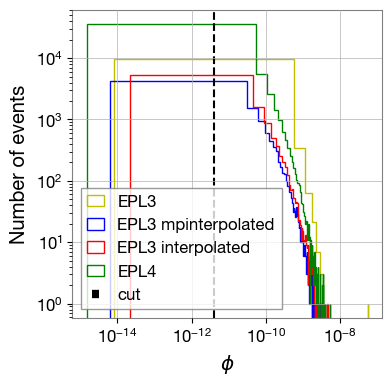

In [ ]:
# plot
plt.figure(figsize=(4,4))
plt.hist(phi_epl1, bins=100, histtype='step', color='y', label='EPL1')
plt.hist(phi_epl2, bins=100, histtype='step', color='b', label='EPL2 mpinterpolated')
plt.hist(phi_epl3, bins=100, histtype='step', color='r', label='EPL3 interpolated')
plt.hist(phi_epl4, bins=100, histtype='step', color='g', label='EPL4')
# plot 4.1048584838253885e-12
plt.axvline(4.1048584838253885e-12, color='k', linestyle='--', label='cut')
plt.xlabel(r'$\phi$')
plt.ylabel('Number of events')
plt.yscale('log')
plt.xscale('log')
# plt.xlim(1e-14, 1e-8)
plt.legend()
plt.show()

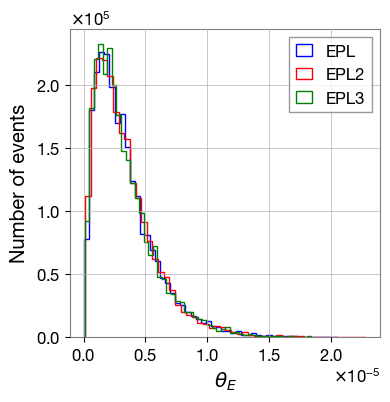

In [11]:
# theta_E comparison
plt.figure(figsize=(4,4))
plt.hist(theta_E1, bins=50, histtype='step', color='b', label='EPL', density=True)
plt.hist(theta_E2, bins=50, histtype='step', color='r', label='EPL2', density=True)
plt.hist(theta_E3, bins=50, histtype='step', color='g', label='EPL3', density=True)
plt.xlabel(r'$\theta_E$')
plt.ylabel('Number of events')
plt.legend()
plt.show()

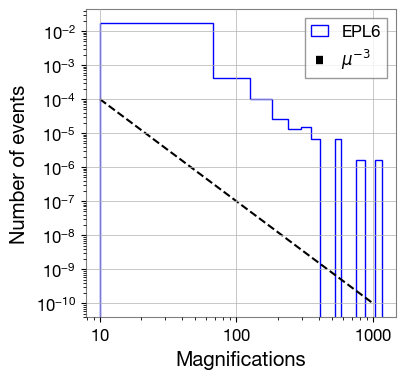

In [10]:
# magnifications comparison
mu_min = 10.0
# mu1 = abs(lensed_param1['magnifications'].flatten())
# mu1 = mu1[mu1>mu_min]
# mu2 = abs(lensed_param2['magnifications'].flatten())
# mu2 = mu2[mu2>mu_min]
# mu3 = abs(lensed_param3['magnifications'].flatten())
# mu3 = mu3[mu3>mu_min]
# mu4 = abs(lensed_param4['magnifications'].flatten())
# mu4 = mu4[mu4>mu_min]
# mu5 = abs(lensed_param5['magnifications'].flatten())
# mu5 = mu5[mu5>mu_min]
mu6 = abs(lensed_param6['magnifications'].flatten())
mu6 = mu6[mu6>mu_min]

plt.figure(figsize=(4,4))
# plt.hist(mu1, bins=20, histtype='step', color='b', label='EPL', density=True)
# plt.hist(mu2, bins=20, histtype='step', color='r', label='EPL2', density=True)
# plt.hist(mu3, bins=20, histtype='step', color='g', label='EPL3', density=True)
# plt.hist(mu4, bins=20, histtype='step', color='y', label='EPL4', density=True) # SIS
#plt.hist(mu5, bins=30, histtype='step', color='k', label='EPL5', density=True)
plt.hist(mu6, bins=20, histtype='step', color='b', label='EPL6', density=True) # SIS
# plot mu**-3
x = np.logspace(1, 3, 100)
y = 0.1 * x**-3
plt.plot(x, y, color='k', linestyle='--', label=r'$\mu^{-3}$')
plt.xlabel('Magnifications')
plt.ylabel('Number of events')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(0, 20)
plt.legend()
plt.show()

In [34]:
_, lensed_param_detectable = ler.lensed_rate(
    lensed_param=lensed_param,
    output_jsonfile="lensed_param_detectable_epl_baseline.json", 
    nan_to_num=False)

Using provided {param_type} dict...
given detectability_condition == step_function
total lensed rate (yr^-1): 0.15621228377114374
number of simulated lensed detectable events: 6
number of simulated all lensed events: 5000
storing detectable params in ./ler_data/lensed_param_detectable_epl_baseline.json


In [36]:
_, lensed_param_detectable = ler.lensed_rate(
    lensed_param=lensed_param2,
    output_jsonfile="lensed_param_detectable_epl_baseline.json", 
    nan_to_num=False)

Using provided {param_type} dict...
given detectability_condition == step_function
total lensed rate (yr^-1): 0.07810614188557187
number of simulated lensed detectable events: 3
number of simulated all lensed events: 5000
storing detectable params in ./ler_data/lensed_param_detectable_epl_baseline.json


In [37]:
_, lensed_param_detectable = ler.lensed_rate(
    lensed_param=lensed_param3,
    output_jsonfile="lensed_param_detectable_epl_baseline.json", 
    nan_to_num=False)

Using provided {param_type} dict...
given detectability_condition == step_function
total lensed rate (yr^-1): 0.9372737026268624
number of simulated lensed detectable events: 36
number of simulated all lensed events: 5000
storing detectable params in ./ler_data/lensed_param_detectable_epl_baseline.json


In [5]:
_, lensed_param_detectable = ler.lensed_rate(
    lensed_param='lensed_param_epl_baseline4.json',
    output_jsonfile="lensed_param_detectable_epl_baseline.json", 
    nan_to_num=False)

Getting lensed_param from json file ./ler_data/lensed_param_epl_baseline4.json...
given detectability_condition == step_function
total lensed rate (yr^-1): 0.2343184256567156
number of simulated lensed detectable events: 18
number of simulated all lensed events: 10000
storing detectable params in ./ler_data/lensed_param_detectable_epl_baseline.json


In [45]:
phi_epl.max(), phi_epl.max()*0.0001, phi_epl.min()

(4.104858483825389e-09, 4.1048584838253886e-13, 2.635542657560037e-14)

In [46]:
np.sum(phi_epl<4.1048584838253886e-13)

66

In [6]:
444.51/0.234

1899.6153846153845

In [3]:
theta_E, e1, e2, gamma, gamma1, gamma2, q = ler.create_data_set(size=100000) # theta_E, e1, e2, gamma, gamma1, gamma2, q

In [4]:
from multiprocessing import Pool
from tqdm import tqdm
from ler.lens_galaxy_population import cross_section_mp

size = 100000

idx = np.arange(size, dtype=int)
# cross section with multiprocessing
params = np.array([theta_E, e1, e2, gamma, gamma1, gamma2, idx]).T

cross_section = np.ones(size)

## with multiprocessing
with Pool(processes=6) as pool:            
    for result in tqdm(
        pool.imap_unordered(cross_section_mp, params),
        total=size,
        ncols=100,
    ):
        idx_, tau_ = result
        cross_section[idx_] = tau_

100%|████████████████████████████████████████████████████| 100000/100000 [00:08<00:00, 11662.63it/s]


In [9]:
cross_section = np.array(cross_section)
cross_section[cross_section>0].min(), np.sum(cross_section<phi_epl.min())

(5.203793019570508e-24, 77895)

In [10]:
phi_epl.min()

1.609424201962239e-14

In [14]:
q = points[6]
q.shape

(1000000,)

In [16]:
phi_cut_SIE(q)

array([0.94584644, 0.91196907, 0.70163575, ..., 0.97043712,
       0.99619066, 0.87814472])

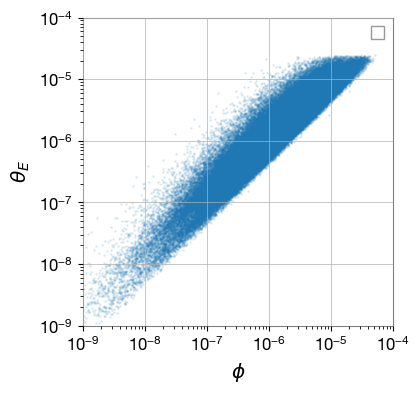

In [7]:
from ler.lens_galaxy_population import phi_cut_SIE
# plot cross section and theta_E
plt.figure(figsize=(4,4))
#plt.plot(cross_section, theta_E*phi_cut_SIE(q), 'o', markersize=1, alpha=0.1, label='SIE')
plt.plot(np.sqrt(cross_section/np.pi), theta_E, 'o', markersize=1, alpha=0.1)
#plt.plot(cross_section, np.pi*theta_E**2, 'o', markersize=1, alpha=0.1, label='SIS')
# plot phi_epl.min()
# plt.axvline(phi_epl.min(), color='k', linestyle='--', label='cut')
# plt.axhline(2.9243287409459857e-08, color='k', linestyle='--', label='cut')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\theta_E$')
plt.yscale('log')
plt.xscale('log')
plt.xlim(1e-9, 1e-4)
plt.ylim(1e-9, 1e-4)
plt.legend()
plt.show()


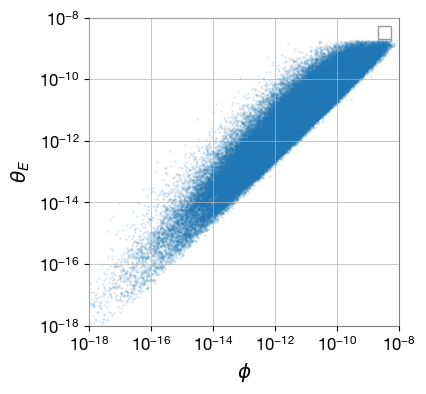

In [9]:
from ler.lens_galaxy_population import phi_cut_SIE
# plot cross section and theta_E
plt.figure(figsize=(4,4))
#plt.plot(cross_section, theta_E*phi_cut_SIE(q), 'o', markersize=1, alpha=0.1, label='SIE')
plt.plot(cross_section, np.pi*theta_E**2, 'o', markersize=1, alpha=0.1)
#plt.plot(cross_section, np.pi*theta_E**2, 'o', markersize=1, alpha=0.1, label='SIS')
# plot phi_epl.min()
# plt.axvline(phi_epl.min(), color='k', linestyle='--', label='cut')
# plt.axhline(2.9243287409459857e-08, color='k', linestyle='--', label='cut')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\theta_E$')
plt.yscale('log')
plt.xscale('log')
plt.xlim(1e-18, 1e-8)
plt.ylim(1e-18, 1e-8)
plt.legend()
plt.show()


In [19]:
idx = cross_section>phi_epl.min()
theta_E_above_cut = theta_E[idx]

In [62]:
theta_E_above_cut.min(), theta_E_above_cut.max(), np.sum(theta_E<theta_E_above_cut.min())

(3.3737892830831026e-08, 2.461484490888584e-05, 30598)

In [20]:
theta_E_above_cut.min(), theta_E_above_cut.max(), np.sum(theta_E<theta_E_above_cut.min())

(2.9243287409459857e-08, 2.456781660724365e-05, 26781)

In [1]:
from ler.rates import LeR

ler = LeR()

Setting multiprocessing start method to 'fork'

Initializing LeR class...


Initializing LensGalaxyParameterDistribution class...


Initializing OpticalDepth class

z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_0.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_0.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_1.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_pickle/velocity_dispersion/velocity_dispersion_ewoud_0.pickle
Using pre-gererated axis ratio rayleigh pdf coefficients...
axis_ratio_rayleigh interpolator will be loaded from ./interpolator_pickle/axis_ratio/axis_ratio_rayleigh_0.pickle
axis_ratio sampler: CPUDispatcher(<function OpticalDept

In [10]:
ler.batch_size = 5
ler.lensed_cbc_statistics(size=10, resume=False, save_batch=False)

lensed params will be store in ./ler_data/lensed_param.json
chosen batch size = 5 with total size = 10
There will be 2 batche(s)
Batch no. 1
sampling lensed params...
sampling lens parameters with sample_all_routine_epl_shear...
current sampled size: 1
current sampled size: 2
current sampled size: 4
current sampled size: 7
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 62.80it/s]

calculating snrs...
Batch no. 2
sampling lensed params...
sampling lens parameters with sample_all_routine_epl_shear...
current sampled size: 1
current sampled size: 2
current sampled size: 3
current sampled size: 6
solving lens equations...



100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 63.21it/s]


calculating snrs...
saving all lensed parameters in ./ler_data/lensed_param.json 


{'zl': array([0.45637617, 1.35677133, 0.6708119 , 0.5287965 ,
        1.47375673, 0.62288466, 0.36267508, 1.44550357,
        0.4297968 , 1.44579413]),
 'zs': array([2.62468234, 4.71572625, 2.02715992, 1.34018847,
        2.19258936, 2.32183773, 3.68832105, 6.93370472,
        3.1829604 , 2.35291507]),
 'sigma': array([152.44952343,  73.21739325, 137.42379815, 138.2487787 ,
        116.68466524,  97.10658073,  75.63561554,  68.23297936,
        112.6872563 , 173.99143517]),
 'q': array([0.38699172, 0.34170744, 0.70176561, 0.46914958,
        0.66462503, 0.72794024, 0.38123036, 0.40619803,
        0.57111142, 0.57172243]),
 'phi': array([4.64921188, 0.3841448 , 1.15209799, 2.87822679,
        0.66227281, 0.5372595 , 0.11359435, 4.61048704,
        5.68604289, 4.47579141]),
 'e1': array([-0.43844625,  0.35281788, -0.11731218,  0.31235494,
         0.04911267,  0.07496943,  0.43647274, -0.41353529,
         0.10037043, -0.2425473 ]),
 'e2': array([ 0.05569625,  0.34094739,  0.13019373, -0

In [3]:
!which python

/Users/phurailatpamhemantakumar/anaconda3/envs/ler/bin/python
